# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

In this case study I’m trying to build a predicted salaries model based on the provided variable.

In [2]:
#import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

#your info here
__author__ = "Ehab Saied"
__email__ = "ehab-saied@hotmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe
train_feature = pd.read_csv('data/train_features.csv')
train_target = pd.read_csv('data/train_salaries.csv')
test_feature = pd.read_csv('data/test_features.csv')

### ---- 3 Clean the data ----

In [4]:
#check the train_feature first lines
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
#check the train_target first lines
train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
#check the test_feature first lines
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
#check the train_feature info
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
#check the train_target info
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
#check the test_feature info
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
# merage the train_feature and the train_target data
train_merage = pd.merge(train_feature, train_target, on='jobId', how='inner')
train_merage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [11]:
#check the train_merage first lines
train_merage.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [12]:
#look for duplicate in new training df
train_merage.duplicated().sum()

0

In [13]:
#look for duplicate in test df
test_feature.duplicated().sum()

0

In [14]:
#checking if there is invalid data (e.g. salaries <=0)
(train_merage.salary <= 0).sum()

5

There are five salary values that is less than or equal to zero.

In [15]:
#remove the 0 values
train_df = train_merage[(train_merage.salary != 0)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


We removed the rows that contain zero values.

### ---- 4 Explore the data (EDA) ----

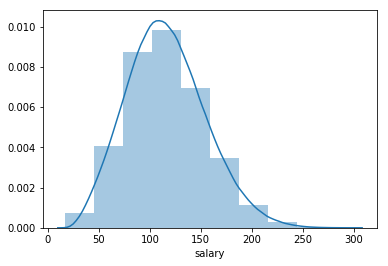

In [16]:
#summarize the target variable distribution
sns.distplot(train_df.salary, bins=10)
plt.show()

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


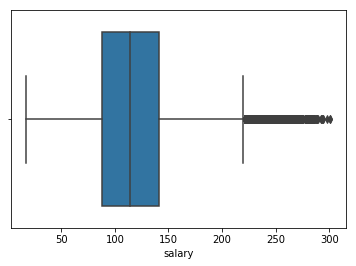

In [17]:
#summarize the target variable boxplot
sns.boxplot(train_df.salary)
plt.show()

There are some values that they looks like outliers but when I investigate it it all looks normal and acceptable.

In [18]:
#look for correlation between categorical feature and the target
def plot_feat(df, col):
    plt.subplot(3,1,1)
    ordered = df.groupby(by=[col])['salary'].median().sort_values(ascending=True).index
    sns.boxplot(x=col, y="salary", data=df, order=ordered)
    
    plt.subplot(3,1,2)
    mean=df.groupby(by=[col])['salary'].mean().sort_values().plot()
    plt.xlabel(col)
    plt.ylabel('salary mean')

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


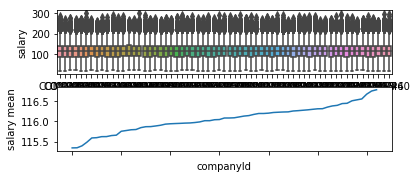

In [19]:
#correlation between companyId and the salary
plot_feat(train_df, 'companyId')

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


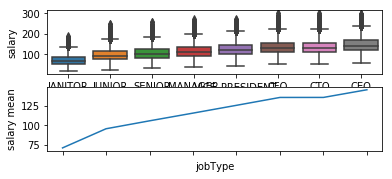

In [20]:
#correlation between jobType and the salary
plot_feat(train_df, 'jobType')

We can see the positive relation between jobType and salary, the higher jobType the higher the income.

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


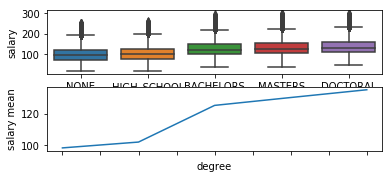

In [22]:
#correlation between degree and the salary
plot_feat(train_df, 'degree')

There is a positive relation between degree and salary.

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


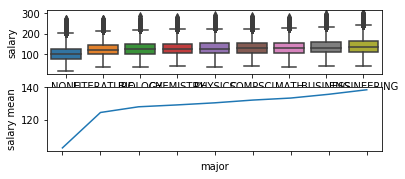

In [23]:
#correlation between major and the salary
plot_feat(train_df, 'major')

The none major workers have the lower salary while the engineering major have the higher salary.

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


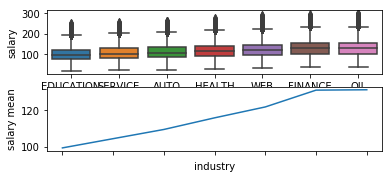

In [24]:
#correlation between industry and the salary
plot_feat(train_df, 'industry')

While he education industrial get the lower salary, the oil industrial make the higher salary.

There is a positive correlation between years of experience and salary.

Text(0,0.5,'Salary')

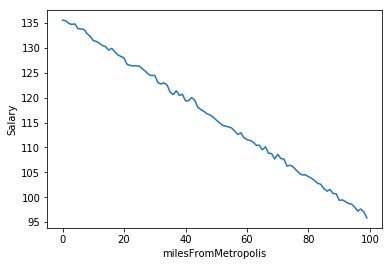

In [25]:
#correlation between yearsExperience and the salary
train_df.groupby('milesFromMetropolis')['salary'].mean().plot()
plt.ylabel('Salary')

There is a negative correlation between milesFromMetropolis and salary.

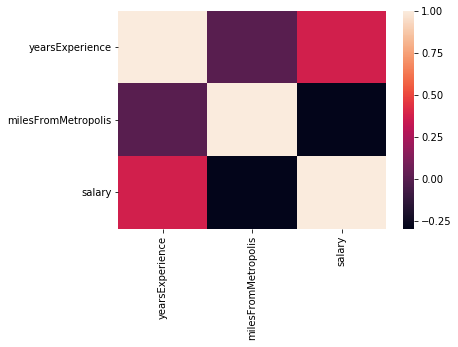

In [26]:
corr = train_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
#separate categorical variables from numerical variables in the train df
cat_train = train_df[['companyId', 'jobType', 'degree', 'major', 'industry']]
num_train = train_df[['yearsExperience', 'milesFromMetropolis']]

In [28]:
#encode the categorical variables in the train df
cat_code_train = pd.get_dummies(cat_train)
num_code_train = (num_train).apply(pd.to_numeric)

In [29]:
#combine the two variables in a new df
new_train = pd.concat([cat_code_train, num_code_train], axis=1)
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 94 columns):
companyId_COMP0           999995 non-null uint8
companyId_COMP1           999995 non-null uint8
companyId_COMP10          999995 non-null uint8
companyId_COMP11          999995 non-null uint8
companyId_COMP12          999995 non-null uint8
companyId_COMP13          999995 non-null uint8
companyId_COMP14          999995 non-null uint8
companyId_COMP15          999995 non-null uint8
companyId_COMP16          999995 non-null uint8
companyId_COMP17          999995 non-null uint8
companyId_COMP18          999995 non-null uint8
companyId_COMP19          999995 non-null uint8
companyId_COMP2           999995 non-null uint8
companyId_COMP20          999995 non-null uint8
companyId_COMP21          999995 non-null uint8
companyId_COMP22          999995 non-null uint8
companyId_COMP23          999995 non-null uint8
companyId_COMP24          999995 non-null uint8
companyId_COMP25         

In [30]:
#separate the target variable from training df
new_target = train_df[['salary']]
new_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 1 columns):
salary    999995 non-null int64
dtypes: int64(1)
memory usage: 55.3 MB


In [31]:
#separate categorical variables from numerical variables in the test df
cat_test = test_feature[['companyId', 'jobType', 'degree', 'major', 'industry']]
num_test = test_feature[['yearsExperience', 'milesFromMetropolis']]

In [32]:
#encode the categorical variables in the test df
cat_code_test = pd.get_dummies(cat_test)
num_code_test = (num_test).apply(pd.to_numeric)

In [33]:
#combine the two variables one new test df
new_test = pd.concat([cat_code_test, num_code_test], axis=1)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 94 columns):
companyId_COMP0           1000000 non-null uint8
companyId_COMP1           1000000 non-null uint8
companyId_COMP10          1000000 non-null uint8
companyId_COMP11          1000000 non-null uint8
companyId_COMP12          1000000 non-null uint8
companyId_COMP13          1000000 non-null uint8
companyId_COMP14          1000000 non-null uint8
companyId_COMP15          1000000 non-null uint8
companyId_COMP16          1000000 non-null uint8
companyId_COMP17          1000000 non-null uint8
companyId_COMP18          1000000 non-null uint8
companyId_COMP19          1000000 non-null uint8
companyId_COMP2           1000000 non-null uint8
companyId_COMP20          1000000 non-null uint8
companyId_COMP21          1000000 non-null uint8
companyId_COMP22          1000000 non-null uint8
companyId_COMP23          1000000 non-null uint8
companyId_COMP24          1000000 non-null uint8
compan

In [34]:
#split the new df to training and test
from sklearn.model_selection import train_test_split
train_ind, test_ind, train_dep, test_dep = train_test_split(new_train, new_target, test_size=0.25, random_state=42)

### ---- 5 Establish a baseline ----

## Applying Linear Regression Model

In [35]:
#importing packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#appling linear regression
ln = LinearRegression()
ln_train = ln.fit(train_ind, train_dep)

In [36]:
#calculate the prediction
ln_test = ln.predict(test_ind)

In [37]:
#calculationg the mean squared errro
print('ln MSE=',mean_squared_error(test_dep, ln_test))

ln MSE= 384.604713154


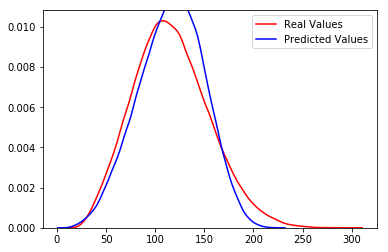

In [38]:
#evalute the ln prediction in the test data
ax1 = sns.distplot(test_dep, hist=False, color="r", label="Real Values")
sns.distplot(ln_test, hist=False, color="b", label="Predicted Values" , ax=ax1)

## Aplying Random Forest Model

In [39]:
#importing packages
from sklearn.ensemble import RandomForestRegressor

#applying random forest
rf = RandomForestRegressor(n_estimators=60,max_depth=25, min_samples_split=60,max_features='auto',n_jobs=-1)
rf_train = rf.fit(train_ind, train_dep.values.ravel())

In [40]:
#calculate the prediction
rf_test = rf.predict(test_ind)

In [41]:
#calculationg the mean squared errro
print('rf MSE=',mean_squared_error(test_dep, rf_test))

rf MSE= 370.857497935


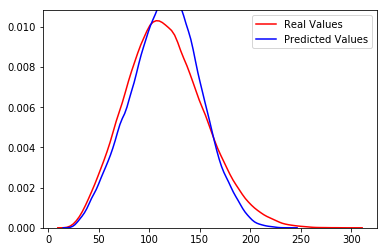

In [53]:
#evalute the rf prediction in the test data
ax2 = sns.distplot(test_dep, hist=False, color="r", label="Real Values")
sns.distplot(rf_test, hist=False, color="b", label="Predicted Values" , ax=ax2)

## Applying Gradient Boosting Regressor Model

In [43]:
#importing packages
from sklearn.ensemble import GradientBoostingRegressor

#appling linear regression
gb = GradientBoostingRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_samples_split=2, )
gb_train = gb.fit(train_ind, train_dep.values.ravel())

In [44]:
#calculate the prediction
gb_test = gb.predict(test_ind) 

In [45]:
#calculationg the mean squared errro
print('gb MSE=',mean_squared_error(test_dep, gb_test))

gb MSE= 359.305210083


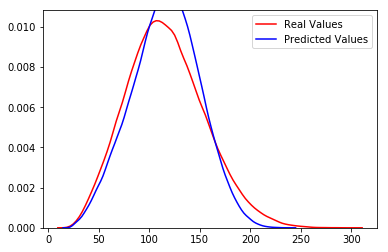

In [52]:
#evalute the gb prediction in the test data
ax3 = sns.distplot(test_dep, hist=False, color="r", label="Real Values")
sns.distplot(gb_test, hist=False, color="b", label="Predicted Values" , ax=ax3)

### ---- 6 Select best model  ----

The best model will be Gradient Boosting Regressor since it has the minimum mean squared error = 359.3

In [47]:
#train model on entire dataset
print('fitting ...')
best_train = gb.fit(new_train, new_target.values.ravel())

#create predictions based on test data
print('predicting ...')
best_pred = gb.predict(new_test)

fitting ...
predicting ...


In [48]:
#summary of prediction
new_pred = pd.DataFrame(best_pred)
prd_df = pd.concat([new_test, new_pred], axis=1)
pred_df = prd_df.rename(columns={0: 'expected_salary'})
pred_df.head()

,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,...,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,expected_salary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,22,73,109.915448
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,20,47,91.965121
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,17,9,179.345506
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,14,96,104.575236
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,44,113.966466


In [49]:
#saveing prediction to a csv file
pred_df.to_csv('data/prediction_df.csv')

## Part 4 - DEPLOY

### ---- 1 Deploy solution ----

Text(0.5,0,'Feature importance')

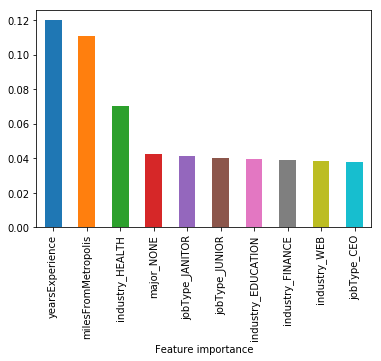

In [50]:
#visualization of feature importance's
fi = pd.Series(gb.feature_importances_, index=new_train.columns).nlargest(10).plot(kind='bar')
plt.xlabel('Feature importance')

We notice that the year of experience is the most importance feature among all other features.